# Home assignment 2, practice part. Classification and visualisation task.

In this home assignment you will vary parametres of a decision tree and random forest. You should write the code in cells marked with `# your code here` and answer the questions. If something remains umbiguous then welcome to the chat :)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.datasets import make_moons
n_moons = 1000
X_moons, y_moons = make_moons(n_samples=n_moons,
                              noise=0.1)

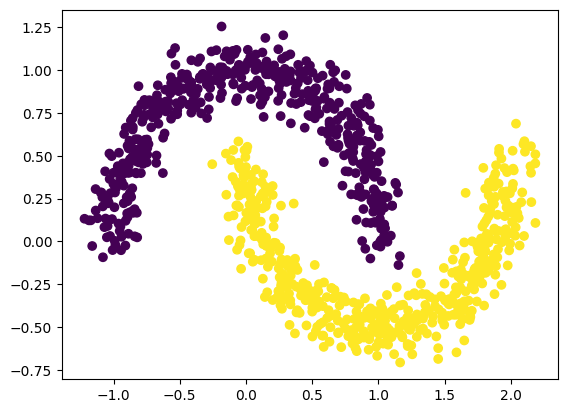

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons)
plt.show()

Make train test split:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=0,train_size = 0.66)

Create Decision Tree Classifier:

In [6]:
clf = DecisionTreeClassifier()

In [7]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

## Visualization of the decision region [example code]

In [1]:
import numpy as np
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

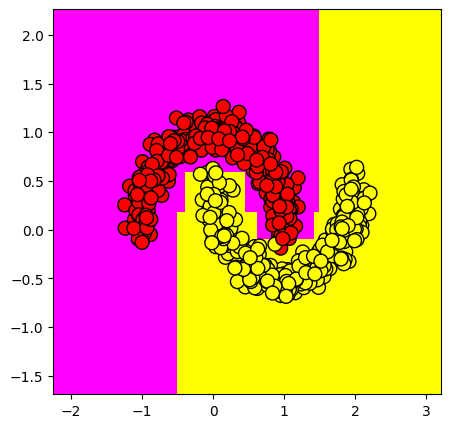

In [ ]:
xx, yy = get_grid(X_train)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolor='k')

##Task 1. Quality evaluation.

## Task 1.1.

Evaluate the classifier quality by calculation presicion and recall metrics. Use cross validation on train dataset.

In [ ]:
def my_precision(y_true, y_pred):
  num_class_as_1 = sum(y_pred)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_class_as_1

In [ ]:
def my_recall(y_true, y_pred):
  num_TRUEs = sum(y_true)
  True_Positive = sum(y_true*y_pred)
  return True_Positive/num_TRUEs

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=3)

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    rf = DecisionTreeClassifier()
    rf.fit(X_train[train_index,:],y_train[train_index])
    y_pred = rf.predict(X_train[test_index,:])
    print(y_pred.shape)

    print("accuracy",
        accuracy_score(rf.predict(X_train[test_index,:]),y_train[test_index]))
    print("precision", my_precision(y_train[test_index],y_pred))
    print("recall", my_recall(y_train[test_index],y_pred))

(220,)
accuracy 0.9818181818181818
precision 0.972972972972973
recall 0.9908256880733946
(220,)
accuracy 0.9818181818181818
precision 1.0
recall 0.963302752293578
(220,)
accuracy 0.9954545454545455
precision 0.9908256880733946
recall 1.0


## Task 1.2.

Calculate roc-auc on test data.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    rf = DecisionTreeClassifier()
    rf.fit(X_train[train_index,:],y_train[train_index])
    y_pred = rf.predict(X_train[test_index,:])
    print(y_pred.shape)

    print("roc auc_ score",
        roc_auc_score(rf.predict(X_train[test_index,:]),y_train[test_index]))

(220,)
roc auc_ score 0.9818993305231838
(220,)
roc auc_ score 0.9826086956521739
(220,)
roc auc_ score 0.9954128440366973


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("roc auc score for Decision Tree classifier", roc_auc_score(y_pred,y_test))

roc auc score for Decision Tree classifier 0.997005988023952


## Task 1.3.

Plot roc-auc curve on test data.

Text(0.5, 1.0, 'Test ROC AUC curve')

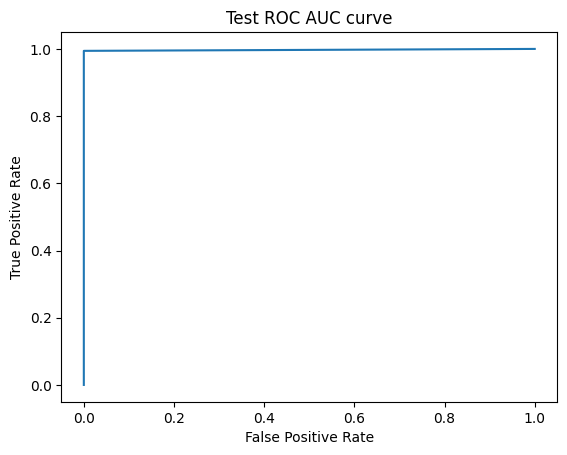

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

test_probailities =  clf.predict_proba(X = X_test)
fp_rates, tp_rates, thresholds = roc_curve(y_true = y_test, y_score = test_probailities[:,1])
plt.plot(fp_rates, tp_rates)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Test ROC AUC curve")

## Task 2. Fit and Plot.

## Task 2.1.

Fit Decision Tree classifiers varying `max_depth` in the set `[1, 3, 5, 10]`. Consider two splitting criteria: "gini" and "entropy".
Take `min_sample_leaf` = 10.

For all the fitted classifiers you have to plot the decision regions (the example is shown above).
  
Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places).

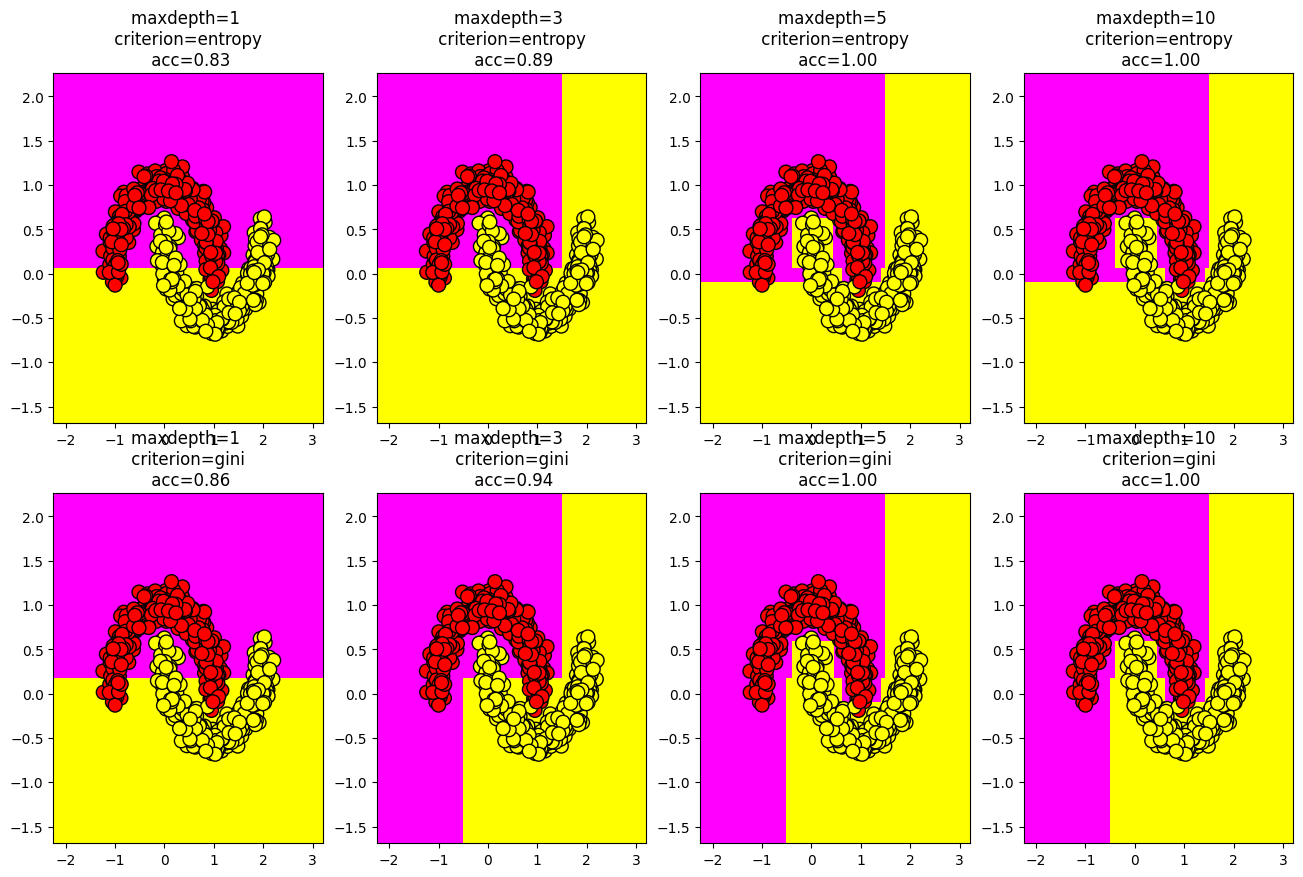

In [ ]:
# For each max_depth in the set [1, 3, 5, 10] and for each criterion in ["gini", "entropy"]
# fit DecisionTreeClassifier, make predictions and use predictions to plot decision regions.
from sklearn.model_selection import GridSearchCV

xx, yy = get_grid(X_train)
fig, axs = plt.subplots(2,4,figsize=(16,10))


for i,criterion_n in enumerate(["entropy","gini"]):
  for j,max_depth_n in enumerate([1, 3, 5, 10]):

    clf = DecisionTreeClassifier(max_depth=max_depth_n,criterion=criterion_n,min_samples_leaf = 10)
    clf.fit(X = X_train,y = y_train)

    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    acc = accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))

    axs[i, j].pcolormesh(xx, yy, predicted, cmap='spring')
    axs[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolor='k')
    axs[i, j].set_title('maxdepth=%i \n criterion=%s \n acc=%.2f' %(max_depth_n,criterion_n,acc))

## Task 2.2.

Interpretation of the plots. Which splitting criterion gives us more stable classification?

Your answer here:
the criterion "gini" gives higgher acc result than "entropy". "Gini"  determines more detailed boundaries

## Task 2.3.  

Using `GridSearchCV` find the best parametres of Decision tree classifier.

Consider `max_depth` in the set [1, 3, 5, 10] and `min_sample_leaf` in the set [10, 50, 100, 200] with chosen splitting criterion.

Use train dataset.


In [ ]:
# your code here
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(criterion="entropy")
parameters = {'max_depth':[1, 3, 5,10],'min_samples_leaf':[10, 50, 100,200]}
clf = GridSearchCV(clf, parameters)
clf.fit(X = X_train,y = y_train)
print(clf.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)


## Task 2.4.

Calculate the roc-auc metrics on the test dataset for Decision tree classifier with best parameters.

roc auc score for Random Forest classifier 0.997005988023952


Text(0.5, 1.0, 'Test ROC AUC curve')

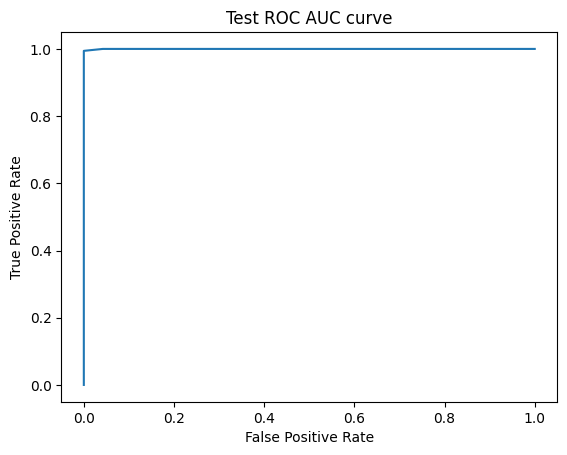

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("roc auc score for Random Forest classifier", roc_auc_score(y_pred,y_test))

test_probailities =  clf.predict_proba(X = X_test)

fp_rates, tp_rates, thresholds = roc_curve(y_true = y_test, y_score = test_probailities[:,1])
plt.plot(fp_rates, tp_rates)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Test ROC AUC curve")


## Task 3. Random Forest classifier.

Now let use use Random Forest classifier:

## Task 3.1.

Using `GridSearchCV` on train dataset find the best value of `max_depth` in the set [1, 3, 5, 10].

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
parameters = {'max_depth':[1, 3, 5,10]}
clf = GridSearchCV(clf, parameters)
clf.fit(X = X_train,y = y_train)
print(clf.best_estimator_)

RandomForestClassifier(max_depth=10)


 ## Task 3.2.

Evaluate the Random forest classifier quality by calculation presicion and recall metrics. Use cross validation on train dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=3)

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    rf = RandomForestClassifier()
    rf.fit(X_train[train_index,:],y_train[train_index])
    y_pred = rf.predict(X_train[test_index,:])
    print(y_pred.shape)

    print("accuracy",
        accuracy_score(rf.predict(X_train[test_index,:]),y_train[test_index]))
    print("precision", my_precision(y_train[test_index],y_pred))
    print("recall", my_recall(y_train[test_index],y_pred))

(220,)
accuracy 0.9863636363636363
precision 1.0
recall 0.9714285714285714
(220,)
accuracy 0.9954545454545455
precision 1.0
recall 0.9904761904761905
(220,)
accuracy 0.9954545454545455
precision 0.9905660377358491
recall 1.0


## Task 3.3.

Compute roc-auc score on test dataset for Random Forest classifier with best parameters.

roc auc score for Random Forest classifier 0.986842105263158


Text(0.5, 1.0, 'Test ROC AUC curve')

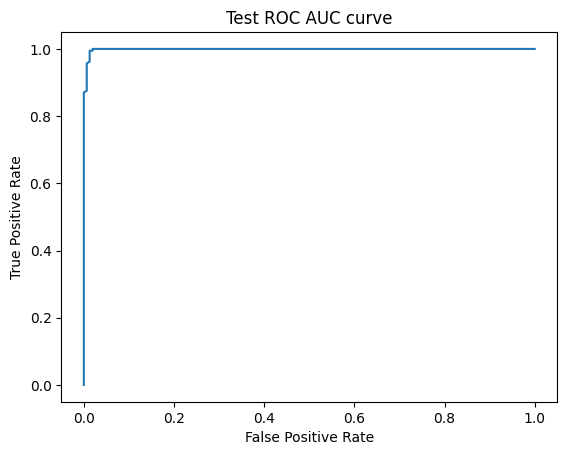

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
clf_rf = RandomForestClassifier(max_depth=10)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
print("roc auc score for Random Forest classifier", roc_auc_score(y_pred,y_test))

test_probailities =  clf_rf.predict_proba(X = X_test)

fp_rates, tp_rates, thresholds = roc_curve(y_true = y_test, y_score = test_probailities[:,1])
plt.plot(fp_rates, tp_rates)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Test ROC AUC curve")

## Task 3.4.

Compare your best Decision tree algorithm with best Random forest.

Which algorithm perform better on test dataset in terms of roc-auc?

Calculate and compare precision and recall metrics of these algorithms on test dataset.

In [ ]:
# ROC AUC curve of Random forest is more close to the perfect ROC curve than curve of Decision tree
# when compared the results interm of precision and recall metrics, The results of the two methods are close to each other
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("precision of DT= ", my_precision(y_test,y_pred))
print("recall of DT= ", my_recall(y_test,y_pred))

clf_rf = RandomForestClassifier(max_depth=10)
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

print("precision of RF= ", my_precision(y_test,y_pred))
print("recall of RF= ", my_recall(y_test,y_pred))

precision of DT=  0.9891891891891892
recall of DT=  0.9891891891891892
precision of RF=  0.9736842105263158
recall of RF=  1.0





## Task 4. Feature engineering.

## Task 4.1.

Add quadatic features into `X_moons` dataset:

Let $(x_1, x_2)$ be the columns of `X_moons`.

Add columns $x_1^{2}, x_2^{2}$ to `X_train` and `X_test`.




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import numpy as np

n_moons = 1000
X_moons, y_moons = make_moons(n_samples=n_moons,
                              noise=0.1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=0,train_size = 0.66)

X_train = np.stack([X_train[:,0], X_train[:,1],X_train[:,0]**2,X_train[:,1]**2], axis=1)
X_test = np.stack([X_test[:,0], X_test[:,1],X_test[:,0]**2,X_test[:,1]**2], axis=1)

## Task 4.2.

Fit a Decision Tree classifier with `max_depth = 4` on X_train.
Calculate `roc_auc` score on `X_test`.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("roc auc score", roc_auc_score(y_pred,y_test))

roc auc score 0.9706564240977197


## Task 4.3.

Plot the decision region of the fitted classifier.
How your decision region changed compared to the dataset without quadratic features?

ValueError: ignored

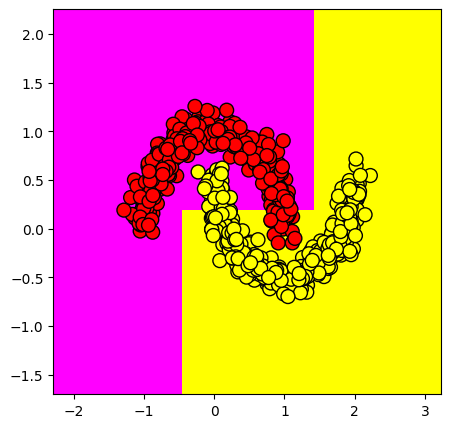

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


n_moons = 1000
X_moons, y_moons = make_moons(n_samples=n_moons,
                              noise=0.1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=0,train_size = 0.66)

xx, yy = get_grid(X_train)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X = X_train,y = y_train)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolor='k')

####


X_train = np.stack([X_train[:,0], X_train[:,1],X_train[:,0]**2,X_train[:,1]**2], axis=1)
X_test = np.stack([X_test[:,0], X_test[:,1],X_test[:,0]**2,X_test[:,1]**2], axis=1)

xx, yy = get_grid(X_train)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolor='k')

## Task 4.4
Now add the cross product column $x_1\cdot x_2$ to `X_train` and `X_test`.

Fit a Decision Tree classifier with `max_depth = 4` on `X_train`
and calculate `roc_auc` score on `X_test`.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_moons
import numpy as np
n_moons = 1000
X_moons, y_moons = make_moons(n_samples=n_moons,
                              noise=0.1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=0,train_size = 0.66)

X_train = np.stack([X_train[:,0], X_train[:,1],np.multiply(X_train[:,0], X_train[:,1])], axis=1)
X_test = np.stack([X_test[:,0], X_test[:,1],np.multiply(X_test[:,0], X_test[:,1])], axis=1)


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("roc auc score", roc_auc_score(y_pred,y_test))

roc auc score 0.9505954853898353


## Task 4.5.

Plot the decision region of the fitted classifier.


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


n_moons = 1000
X_moons, y_moons = make_moons(n_samples=n_moons,
                              noise=0.1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=0,train_size = 0.66)

X_train = np.stack([X_train[:,0], X_train[:,1],np.multiply(X_train[:,0], X_train[:,1])], axis=1)
X_test = np.stack([X_test[:,0], X_test[:,1],np.multiply(X_test[:,0], X_test[:,1])], axis=1)

xx, yy = get_grid(X_train)


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X = X_train,y = y_train)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='autumn', edgecolor='k')




ValueError: ignored

What are your conclusions about adding cross product features?